<a href="https://colab.research.google.com/github/kashishnarwal/WEbLogServerAnalysis/blob/main/LogAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install advertools



In [ ]:
!pip install ua-parser


In [ ]:
import advertools as adv
import pandas as pd
from ua_parser import user_agent_parser
import pyarrow.parquet as pq
import pyarrow
from ipywidgets import interact
import ua_parser
pd.options.display.max_columns = None

for p in [adv, pd, pyarrow]:
    print(f'{p.__name__:-<14}v{p.__version__}')

advertools----v0.13.5
pandas--------v1.5.3
pyarrow-------v9.0.0


In [ ]:
! dir

errors_file.txt  host_df.csv  log_data.csv  log_file.log  output_file.parquet  sample_data


In [ ]:
!head  /log_file.log

87.116.74.253 - - [28/Feb/2022:14:04:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.109 Safari/537.36"
91.196.124.220 - - [28/Feb/2022:14:04:47 +0200] "POST /wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625" "WordPress/5.9.1; https://nargile.bg"
91.196.124.220 - - [28/Feb/2022:14:06:45 +0200] "POST /wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000" "WordPress/5.9.1; https://nargile.bg"
87.116.74.253 - - [28/Feb/2022:14:06:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHT

In [ ]:
%%time
adv.logs_to_df(
    log_file='/log_file.log',
    output_file='output_file.parquet',
    errors_file='errors_file.txt',
    log_format='combined')

ValueError: ignored

In [ ]:
logs_df = pd.read_parquet('output_file.parquet')
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'],
                                     format='%d/%b/%Y:%H:%M:%S %z')

In [ ]:
logs_df.head()

,client,userid,datetime,method,request,status,size,referer,user_agent
0,87.116.74.253,-,2022-02-28 14:04:44+02:00,POST,/wp-admin/admin-ajax.php,200,47.0,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
1,91.196.124.220,-,2022-02-28 14:04:47+02:00,POST,/wp-cron.php?doing_wp_cron=1646049887.24761605...,200,NaN,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg
2,91.196.124.220,-,2022-02-28 14:06:45+02:00,POST,/wp-cron.php?doing_wp_cron=1646050005.39478302...,200,NaN,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg
3,87.116.74.253,-,2022-02-28 14:06:44+02:00,POST,/wp-admin/admin-ajax.php,200,47.0,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
4,66.249.70.57,-,2022-02-28 14:06:46+02:00,GET,/category/alpaca-bowls/,200,262929.0,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...


In [ ]:
logs_df.head(5)

,client,userid,datetime,method,request,status,size,referer,user_agent
0,87.116.74.253,-,2022-02-28 14:04:44+02:00,POST,/wp-admin/admin-ajax.php,200,47.0,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
1,91.196.124.220,-,2022-02-28 14:04:47+02:00,POST,/wp-cron.php?doing_wp_cron=1646049887.24761605...,200,NaN,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg
2,91.196.124.220,-,2022-02-28 14:06:45+02:00,POST,/wp-cron.php?doing_wp_cron=1646050005.39478302...,200,NaN,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg
3,87.116.74.253,-,2022-02-28 14:06:44+02:00,POST,/wp-admin/admin-ajax.php,200,47.0,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
4,66.249.70.57,-,2022-02-28 14:06:46+02:00,GET,/category/alpaca-bowls/,200,262929.0,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...


In [ ]:
logs_df = pd.read_parquet('output_file.parquet')

csv_file_path = 'log_data.csv'
logs_df.to_csv(csv_file_path, index=False)



In [ ]:
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'], format='%d/%b/%Y:%H:%M:%S %z')
time_duration=logs_df['datetime'].max() - logs_df['datetime'].min()
print(f"Time Duration: {time_duration.days} days, {time_duration.seconds // 3600} hours, {time_duration.seconds % 3600 // 60} minutes, {time_duration.seconds % 60} seconds")


Time Duration: 0 days, 2 hours, 51 minutes, 42 seconds


In [ ]:
host_df = adv.reverse_dns_lookup(logs_df['client'])
host_df.to_csv('host_df.csv', index=False)

In [ ]:
logs_df.columns


Index(['client', 'userid', 'datetime', 'method', 'request', 'status', 'size',
       'referer', 'user_agent'],
      dtype='object')

In [ ]:
host_df = pd.read_csv('host_df.csv')
(host_df
 .head(20)
 .style
 .background_gradient(subset=['count', 'cum_count', 'perc', 'cum_perc'])
 .format({'count': '{:,}', 'cum_count': '{:,}', 'perc': '{:.1%}', 'cum_perc': '{:.1%}'}))

,ip_address,count,cum_count,perc,cum_perc,hostname,aliaslist,ipaddrlist,errors
0,91.139.164.207,721,721,5.9%,5.9%,nan,nan,nan,[Errno 1] Unknown host
1,46.238.56.74,705,"1,426",5.7%,11.6%,ip-46-238-56-74.home.megalan.bg,nan,46.238.56.74,nan
2,31.211.159.44,622,"2,048",5.1%,16.6%,nan,nan,nan,[Errno 1] Unknown host
3,149.62.204.185,551,"2,599",4.5%,21.1%,nan,nan,nan,[Errno 1] Unknown host
4,176.12.22.61,447,"3,046",3.6%,24.8%,176-12-22-61.pon.spectrumnet.bg,nan,176.12.22.61,nan
5,212.39.89.183,438,"3,484",3.6%,28.3%,212-39-89-183.ip.btc-net.bg,nan,212.39.89.183,nan
6,93.183.177.26,426,"3,910",3.5%,31.8%,pop-177.26.escom.bg,nan,93.183.177.26,nan
7,165.225.203.37,421,"4,331",3.4%,35.2%,nan,nan,nan,[Errno 1] Unknown host
8,109.189.93.87,390,"4,721",3.2%,38.4%,ti0186q160-1857.bb.online.no,nan,109.189.93.87,nan
9,94.155.70.230,375,"5,096",3.0%,41.4%,94-155-70-230.ip.btc-net.bg,nan,94.155.70.230,nan


In [ ]:
host_df[host_df['hostname'].fillna('').str.contains('google')]

,ip_address,count,cum_count,perc,cum_perc,hostname,aliaslist,ipaddrlist,errors
49,66.249.70.59,27,11759,0.002195,0.955939,crawl-66-249-70-59.googlebot.com,NaN,66.249.70.59,NaN
50,66.249.70.57,27,11786,0.002195,0.958133,crawl-66-249-70-57.googlebot.com,NaN,66.249.70.57,NaN
65,66.249.70.61,9,11970,0.000732,0.973092,crawl-66-249-70-61.googlebot.com,NaN,66.249.70.61,NaN
79,34.148.84.104,4,12040,0.000325,0.978782,104.84.148.34.bc.googleusercontent.com,NaN,34.148.84.104,NaN
82,34.148.152.39,3,12050,0.000244,0.979595,39.152.148.34.bc.googleusercontent.com,NaN,34.148.152.39,NaN
...,...,...,...,...,...,...,...,...,...
220,34.74.93.5,1,12262,0.000081,0.996830,5.93.74.34.bc.googleusercontent.com,NaN,34.74.93.5,NaN
221,34.139.224.225,1,12263,0.000081,0.996911,225.224.139.34.bc.googleusercontent.com,NaN,34.139.224.225,NaN
222,35.231.94.88,1,12264,0.000081,0.996992,88.94.231.35.bc.googleusercontent.com,NaN,35.231.94.88,NaN
242,35.229.54.70,1,12284,0.000081,0.998618,70.54.229.35.bc.googleusercontent.com,NaN,35.229.54.70,NaN


In [ ]:
ip_host_dict = dict(zip(host_df['ip_address'], host_df['hostname']))
logs_df['hostname'] = [ip_host_dict[ip] for ip in logs_df['client']]
logs_df.head(3)

,client,userid,datetime,method,request,status,size,referer,user_agent,hostname
0,87.116.74.253,-,2022-02-28 14:04:44+02:00,POST,/wp-admin/admin-ajax.php,200,47.0,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,87-116-74-253.ip.btc-net.bg
1,91.196.124.220,-,2022-02-28 14:04:47+02:00,POST,/wp-cron.php?doing_wp_cron=1646049887.24761605...,200,NaN,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg,ns77.superhosting.bg
2,91.196.124.220,-,2022-02-28 14:06:45+02:00,POST,/wp-cron.php?doing_wp_cron=1646050005.39478302...,200,NaN,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg,ns77.superhosting.bg


In [ ]:
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'])
hourly_ip_hits = logs_df.groupby([logs_df['datetime'].dt.hour, 'client']).size().reset_index(name='count')

top_10_hourly_ip_hits = hourly_ip_hits.sort_values('count', ascending=False).head(10)

print(top_10_hourly_ip_hits)



     datetime          client  count
330        16  91.139.164.207    721
168        15    46.238.56.74    573
13         14  149.62.204.185    550
214        16    176.12.22.61    447
28         14   212.39.89.183    438
190        15   93.183.177.26    426
212        16  165.225.203.37    421
39         14   31.211.159.44    421
110        15   109.189.93.87    390
95         14  79.100.228.118    295


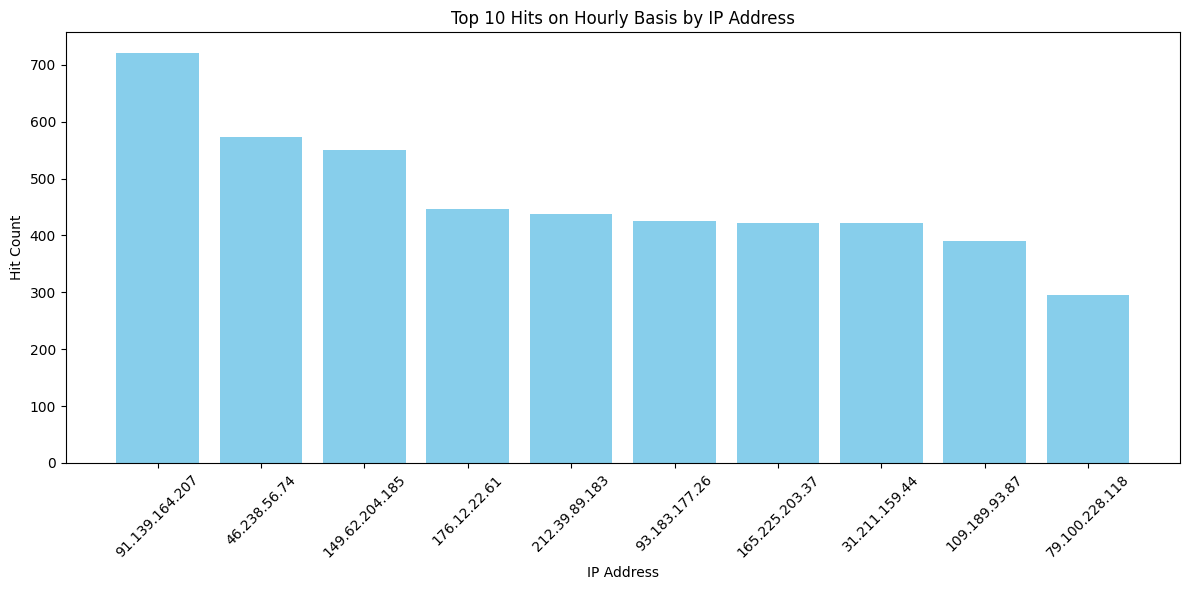

In [ ]:
import matplotlib.pyplot as plt

top_10_ips = top_10_hourly_ip_hits['client']
top_10_counts = top_10_hourly_ip_hits['count']

plt.figure(figsize=(12, 6))
plt.bar(top_10_ips, top_10_counts, color='skyblue')
plt.xlabel('IP Address')
plt.ylabel('Hit Count')
plt.title('Top 10 Hits on Hourly Basis by IP Address')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


200    11508
304      421
404      245
301       70
406       18
500       18
302       13
206        4
401        3
403        1
Name: status, dtype: int64


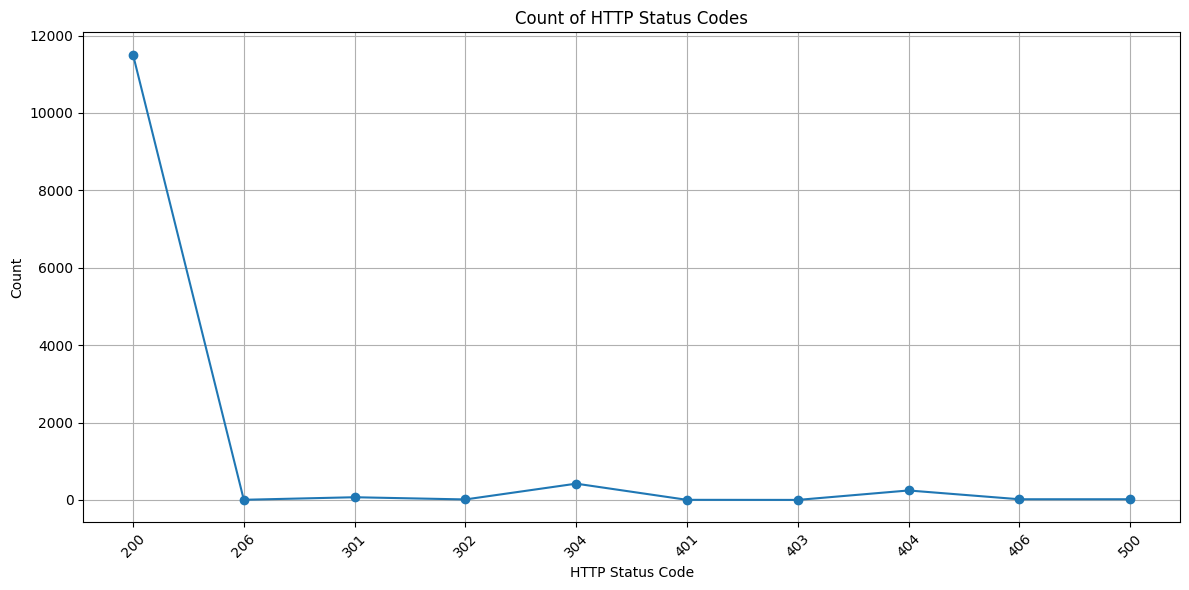

In [ ]:
http_status_counts = logs_df['status'].value_counts()
print(http_status_counts)

http_status_counts_sorted = http_status_counts.sort_index()

plt.figure(figsize=(12, 6))
plt.plot(http_status_counts_sorted.index, http_status_counts_sorted.values, marker='o', linestyle='-')
plt.xlabel('HTTP Status Code')
plt.ylabel('Count')
plt.title('Count of HTTP Status Codes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()








In [ ]:
url_hits = logs_df['request'].value_counts()
url_with_max_hits = url_hits.idxmax()
max_hits = url_hits.max()

print(f"URL with Maximum Hits: {url_with_max_hits}")
print(f"Number of Hits: {max_hits}")


URL with Maximum Hits: /wp-content/uploads/2021/05/HLGN-Logo.png
Number of Hits: 176


In [ ]:
url_hits = logs_df['request'].value_counts()
print(url_hits)


/wp-content/uploads/2021/05/HLGN-Logo.png                                                                   176
/?wc-ajax=get_refreshed_fragments                                                                           140
/wp-admin/admin-ajax.php                                                                                    107
/                                                                                                           107
/?nitroWebhook=cache_ready&token=fdccd0f43d6699b0ad7852228297d999                                            63
                                                                                                           ... 
/wp-content/uploads/2021/06/%D0%BE%D0%B1%D0%BB%D0%B0%D0%BA%D0%BE-s-marble-green-black-600x600.jpg             1
/wp-content/uploads/2021/06/%D0%BE%D0%B1%D0%BB%D0%B0%D0%BA%D0%BE-s-marble-blue-black-600x600.jpg              1
/wp-content/uploads/2021/06/%D0%BE%D0%B1%D0%BB%D0%B0%D0%BA%D0%BE-s-lime-600x600.jpg                     

In [ ]:
logs_df['platform'] = logs_df['user_agent'].apply(lambda x: user_agent_parser.Parse(x)['os']['family'])
platform_hits = logs_df['platform'].value_counts()
print(platform_hits)

iOS         4054
Android     3904
Windows     3601
Other        388
Mac OS X     354
Name: platform, dtype: int64


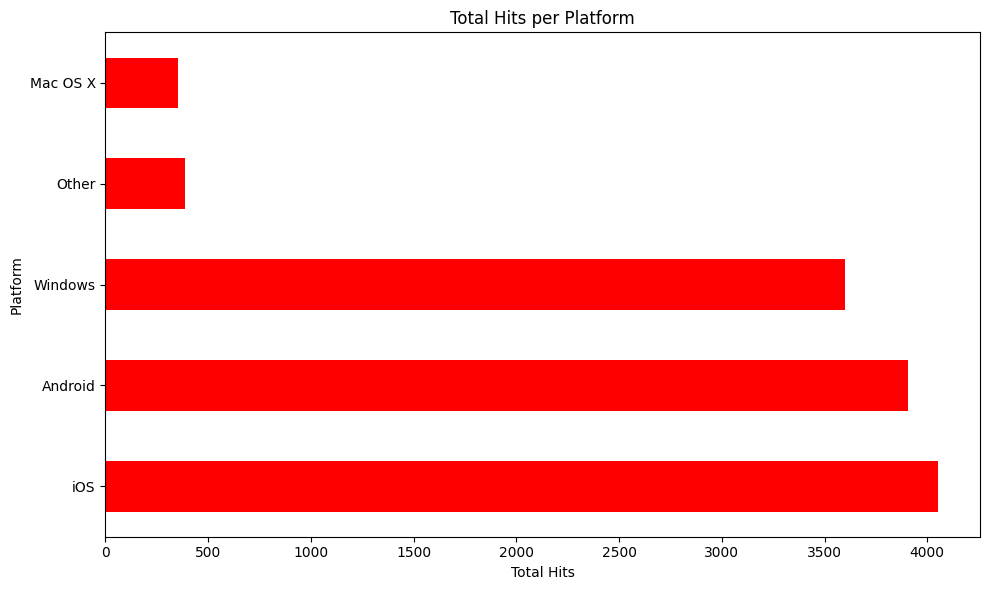

In [ ]:
plt.figure(figsize=(10, 6))
platform_hits.plot(kind='barh', color='red')
plt.xlabel('Total Hits')
plt.ylabel('Platform')
plt.title('Total Hits per Platform')
plt.tight_layout()
plt.show()

In [ ]:
logs_df['browser'] = logs_df['user_agent'].apply(lambda x: user_agent_parser.Parse(x)['user_agent']['family'])
browser_hits = logs_df['browser'].value_counts()
print(browser_hits)

Chrome Mobile                 3189
Chrome                        2479
Mobile Safari                 2148
Opera                          632
Chrome Mobile iOS              622
Instagram                      605
Firefox                        583
Google                         439
Facebook                       423
Chrome Mobile WebView          360
Edge                           206
WordPress                      181
Samsung Internet               122
Safari                          77
bingbot                         68
FacebookBot                     55
Googlebot                       53
PetalBot                        17
Other                           14
Googlebot-Image                 10
SemrushBot                       9
Mobile Safari UI/WKWebView       5
AhrefsBot                        3
MJ12bot                          1
Name: browser, dtype: int64


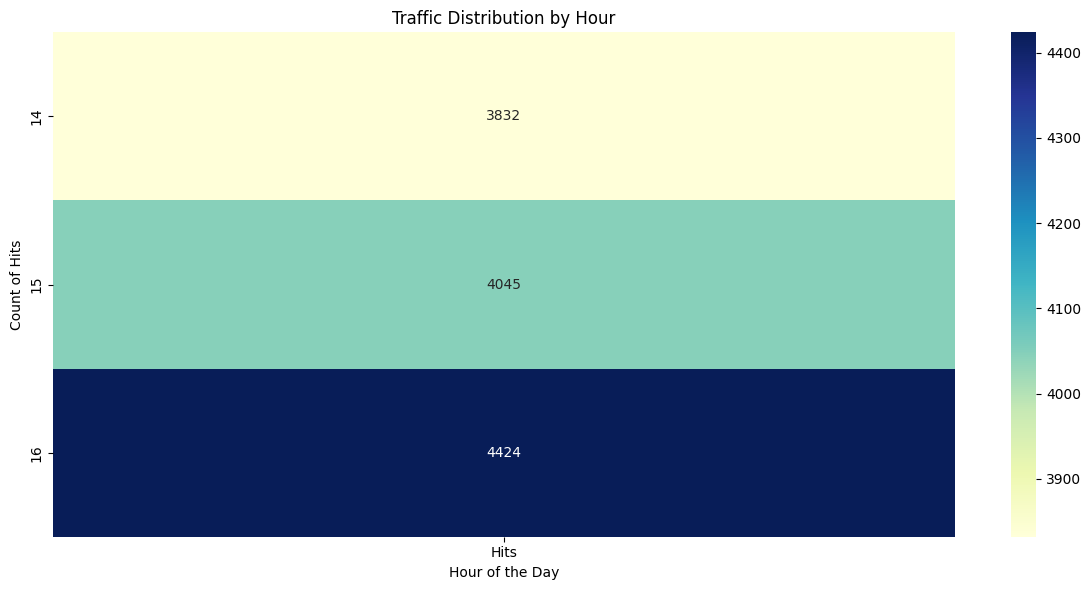

In [ ]:
import seaborn as sns

logs_df['datetime'] = pd.to_datetime(logs_df['datetime'])
logs_df['hour'] = logs_df['datetime'].dt.hour
hourly_traffic = logs_df['hour'].value_counts().sort_index()
hourly_traffic_df = pd.DataFrame({'Hour': hourly_traffic.index, 'Hits': hourly_traffic.values})

plt.figure(figsize=(12, 6))
sns.heatmap(hourly_traffic_df.set_index('Hour'), cmap='YlGnBu', annot=True, fmt='g', cbar=True)
plt.title('Traffic Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Hits')
plt.tight_layout()
plt.show()


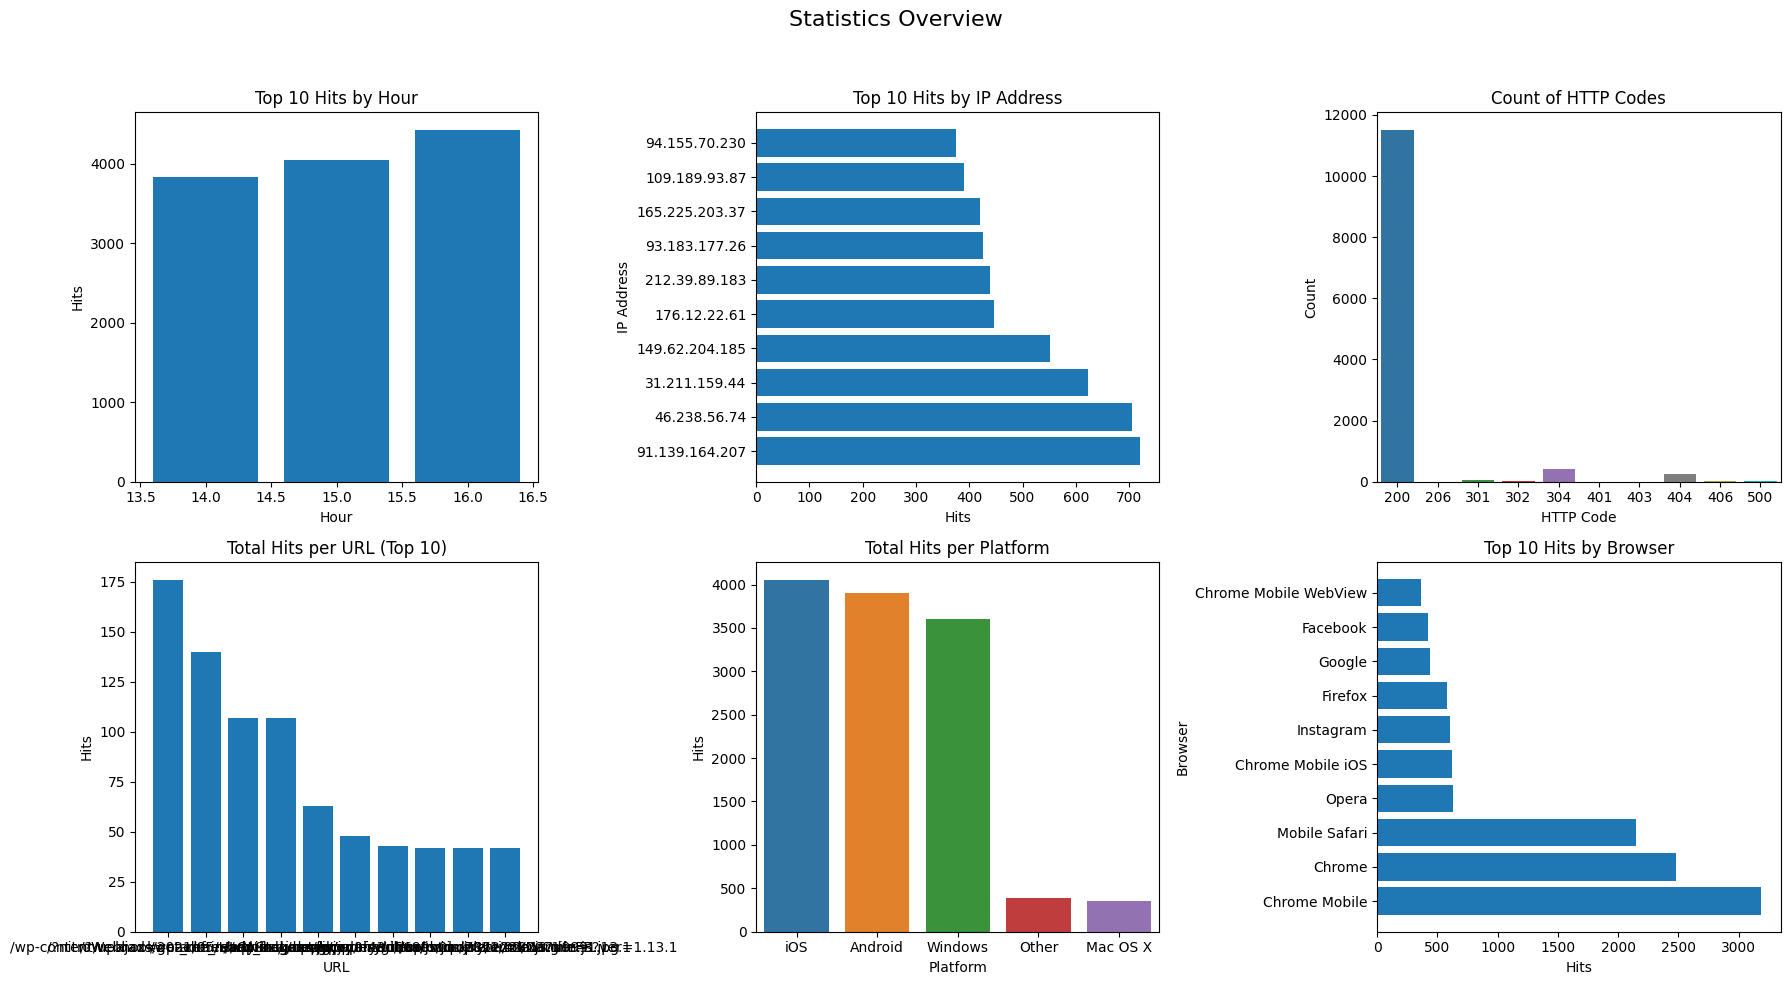

In [ ]:
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'])
logs_df['hour'] = logs_df['datetime'].dt.hour

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Statistics Overview', fontsize=16)

hourly_hits = logs_df['hour'].value_counts().sort_index().head(10)
axs[0, 0].bar(hourly_hits.index, hourly_hits.values)
axs[0, 0].set_title('Top 10 Hits by Hour')
axs[0, 0].set_xlabel('Hour')
axs[0, 0].set_ylabel('Hits')

top_ip_hits = logs_df['client'].value_counts().reset_index().head(10)
top_ip_hits.columns = ['IP Address', 'Hits']
axs[0, 1].barh(top_ip_hits['IP Address'], top_ip_hits['Hits'])
axs[0, 1].set_title('Top 10 Hits by IP Address')
axs[0, 1].set_xlabel('Hits')
axs[0, 1].set_ylabel('IP Address')

http_code_counts = logs_df['status'].value_counts().sort_index()
sns.barplot(x=http_code_counts.index, y=http_code_counts.values, ax=axs[0, 2])
axs[0, 2].set_title('Count of HTTP Codes')
axs[0, 2].set_xlabel('HTTP Code')
axs[0, 2].set_ylabel('Count')

url_hits = logs_df['request'].value_counts()
axs[1, 0].bar(url_hits.index[:10], url_hits.values[:10])
axs[1, 0].set_title('Total Hits per URL (Top 10)')
axs[1, 0].set_xlabel('URL')
axs[1, 0].set_ylabel('Hits')

platform_hits = logs_df['platform'].value_counts()
sns.barplot(x=platform_hits.index, y=platform_hits.values, ax=axs[1, 1])
axs[1, 1].set_title('Total Hits per Platform')
axs[1, 1].set_xlabel('Platform')
axs[1, 1].set_ylabel('Hits')

browser_hits = logs_df['browser'].value_counts().head(10)
axs[1, 2].barh(browser_hits.index, browser_hits.values)
axs[1, 2].set_title('Top 10 Hits by Browser')
axs[1, 2].set_xlabel('Hits')
axs[1, 2].set_ylabel('Browser')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


